In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Basic Graph

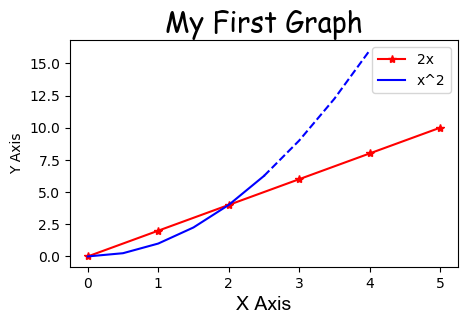

In [2]:
x = [0,1,2,3,4,5]
y = [0,2,4,6,8,10]

plt.figure(figsize = (5,3), dpi = 100)
#plt.plot(x,y, label = '2x', color = 'red', linewidth = 1, linestyle = '--', marker = '.', markersize = 10, markeredgecolor = 'blue')

# use shorthand notation
# fmt = '[color][marker][line]'
plt.plot(x, y, 'r*-', label = '2x')


# Line Number Two
x2 = np.arange(0, 4.5, 0.5)
plt.plot(x2[:6], x2[:6]**2, 'b', label = 'x^2')
plt.plot(x2[5:], x2[5:]**2, 'b--')

plt.title("My First Graph", fontdict = {'fontname': 'Comic Sans MS', 'fontsize': 20})
plt.xlabel("X Axis", fontdict = {'fontname': 'Arial', 'fontsize': 14})
plt.ylabel("Y Axis")

plt.xticks([0,1,2,3,4,5])
#plt.yticks([0,2,4,6,8,10])

plt.legend()

plt.savefig('./figs/myfirstgraph.png', dpi = 300)
plt.show()

# Bar Chart

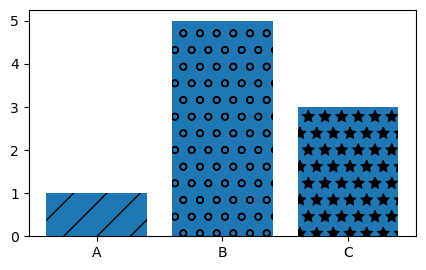

In [3]:
labels = ['A', 'B', 'C']
values = [1,5,3]

plt.figure(figsize = (5,3), dpi = 100)
bars = plt.bar(labels, values)

patterns = ['/', 'o', '*']
for bar in bars:
    bar.set_hatch(patterns.pop(0))
    
# bars[0].set_hatch('/')
# bars[1].set_hatch('o')
# bars[2].set_hatch('*')

plt.savefig('./figs/myfirstbar.png')
plt.show()

# Line Graph

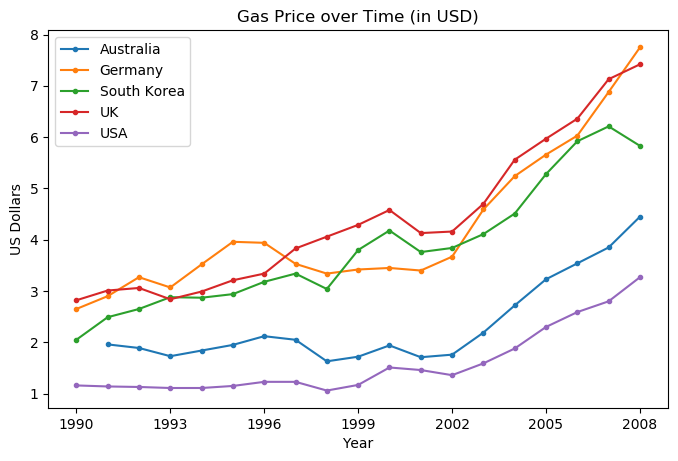

In [32]:
gas = pd.read_csv('./data/gas_prices.csv')

plt.figure(figsize = (8,5), dpi = 100)

plt.title('Gas Price over Time (in USD)')

# show country one by one
# plt.plot(gas.Year, gas.USA, 'b.-', label = 'United States')
# plt.plot(gas.Year, gas.Canada, 'r.-',label = 'Canada')
# plt.plot(gas['Year'], gas['South Korea'], 'g.-',label = 'South Korea')
# plt.plot(gas['Year'], gas['Australia'], 'y.-',label = 'Australia')

# show all countries
# for country in gas:
#     if country != 'Year':
#         plt.plot(gas.Year, gas[country], '.-', label = country)

countries_to_look_at = ['USA', 'South Korea', 'Australia', 'Germany', 'UK']

for country in gas:
    if country in countries_to_look_at:
        plt.plot(gas['Year'], gas[country], '.-',label = country)

    
plt.xticks(gas.Year[::3])
plt.xlabel('Year')
plt.ylabel('US Dollars')
plt.legend()

plt.savefig('./figs/gas_price.png', dpi = 100)
plt.show()